**RESEARCH AIM**:

---
*   Comparison of transfer learning models (VGG16, Resnet101), vision transformer models (ConvNext model), Lightweight models (Slim model)  and
 and custom built ALL CNN image
classification models.

**RESEARCH BY**: Benedict Ibe

**DURATION**: August 2024 - September 2024

**DATA SOURRCE**:

---

https://www.kaggle.com/datasets/mehradaria/leukemia

**STEPS TO LOADING THE DATA AND RUNNING THE NOTEBOOK**

---
1.   Download the data as a zip file from the link above
2.   Make sure the data is saved as or renamed to 'all_data.zip', so as to match the unzipping code, else it wont work.

3.   upload the zip file into google colab where this notebook was loaded.

4.   Click on run all

In [2]:
!pip install numpy opencv-python Pillow

In [3]:
import tensorflow as tf
print(tf.__version__)

2024-09-23 17:21:46.142720: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-23 17:21:46.484434: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-23 17:21:46.581206: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.17.0


In [1]:
#Import the required libraries
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Sequential

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow import keras

from tensorflow.keras import regularizers

In [2]:
#Define the path or directory where the unzipped file is created
raw_data_dir = '/kaggle/input/all-dataset'

In [3]:
#Initialize an empty list of the dataframe columns to be created
df = pd.DataFrame(columns=['IMAGE', 'Class', 'image_type'])

Given that there are two main folders, one containing the original peripheral blood smear images (PBS) and the other containing the segmented PBS, we will put them in a column so that we can easily select the image type we want to feed into our model to train with

#What this code does is that it will go through each main directory which is either the originnal or segmented image directory, then, go through each sub-directory inside the main directory which basically constitutes the class label, then go through each image whithin each class label folder, and write the path to the image as the IMAGE_PATH in the dataframe we are creating, while putting the class label it belongs to and the type of image it is(Original or Segmented)


In [4]:
# Iterate or go through each data type directory (Original and Segmented)
for image_type in ['Original', 'Segmented']:
    type_dir = os.path.join(raw_data_dir, image_type)

    if not os.path.exists(type_dir):
        print(f"Directory {type_dir} does not exist. Check the zip extraction and path.")
        continue

    for class_label in ['Benign', 'Early', 'Pre', 'Pro']:
        class_dir = os.path.join(type_dir, class_label)

        if not os.path.exists(class_dir):
            print(f"Class directory {class_dir} does not exist. Check the dataset structure.")
            continue

        for image_file in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_file)
            # Create a new DataFrame for the current row and append it to the existing DataFrame
            new_row = pd.DataFrame({
                'IMAGE': [image_path],
                'Class': [class_label],
                'image_type': [image_type]
            })
            df = pd.concat([df, new_row], ignore_index=True)

In [5]:
df.head()

IMAGE   Class image_type
0  /kaggle/input/all-dataset/Original/Benign/WBC-...  Benign   Original
1  /kaggle/input/all-dataset/Original/Benign/WBC-...  Benign   Original
2  /kaggle/input/all-dataset/Original/Benign/WBC-...  Benign   Original
3  /kaggle/input/all-dataset/Original/Benign/WBC-...  Benign   Original
4  /kaggle/input/all-dataset/Original/Benign/WBC-...  Benign   Original

NOTE: When it comes to diagnosing acute lymphoblastic leukemia (ALL) from peripheral blood smear (PBS) images, using a segmented image dataset offers numerous important advantages for image classification tasks. Segmentation separates the regions of interest (ROIs) from the background and concentrates on the cells that are essential for diagnosis. This is especially true when segmentation is carried out using color thresholding in the HSV color space. Thus Segmented images has been shown to reduce the nnoise withing the images thus ensuring higher accuracy.

In [6]:
#Define the image type to be used
data_type = 'Original'

In [7]:
#Select the image type to be used for the analysis (Here we used the segmented images as it is most preferred but you can still choose the original images and train with it to see the accuracy)
segmennted_df = df[(df['image_type'] == data_type)]

In [8]:
segmennted_df

IMAGE   Class image_type
0     /kaggle/input/all-dataset/Original/Benign/WBC-...  Benign   Original
1     /kaggle/input/all-dataset/Original/Benign/WBC-...  Benign   Original
2     /kaggle/input/all-dataset/Original/Benign/WBC-...  Benign   Original
3     /kaggle/input/all-dataset/Original/Benign/WBC-...  Benign   Original
4     /kaggle/input/all-dataset/Original/Benign/WBC-...  Benign   Original
...                                                 ...     ...        ...
3251  /kaggle/input/all-dataset/Original/Pro/WBC-Mal...     Pro   Original
3252  /kaggle/input/all-dataset/Original/Pro/WBC-Mal...     Pro   Original
3253  /kaggle/input/all-dataset/Original/Pro/WBC-Mal...     Pro   Original
3254  /kaggle/input/all-dataset/Original/Pro/WBC-Mal...     Pro   Original
3255  /kaggle/input/all-dataset/Original/Pro/WBC-Mal...     Pro   Original

[3256 rows x 3 columns]

In [9]:
pip install tensorflow tensorflow-datasets matplotlib opencv-python-headless

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [10]:
!pip install opendatasets --upgrade

In [11]:
import opendatasets as od
import cv2
import imghdr
import tensorflow as tf
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import torchvision
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim

In [12]:
image_path = "https://www.kaggle.com/datasets/andrewmvd/malignant-lymphoma-classification"

{"username":"ibebenedict","key":"f9402928d7dce1078c5310e48dfb2874"}

In [13]:
od.download(image_path)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  ibebenedict


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/malignant-lymphoma-classification


100%|██████████| 1.34G/1.34G [00:54<00:00, 26.4MB/s]


In [14]:
import os
import pandas as pd
from PIL import Image

# Define dataset path (update with your actual Kaggle dataset path)
dataset_path = "/kaggle/working/malignant-lymphoma-classification"  # Change to actual dataset path

# Define output directory for JPG images
output_dir = "/kaggle/working/extracted_images"
os.makedirs(output_dir, exist_ok=True)

# List of folders (Class Labels)
class_labels = ["CLL", "FL", "MCL"]

# Initialize a list to store the DataFrame rows
data = []

# Loop through each class folder
for class_label in class_labels:
    class_dir = os.path.join(dataset_path, class_label)
    
    if os.path.exists(class_dir):  # Ensure folder exists
        for file_name in os.listdir(class_dir):
            if file_name.endswith(".tif"):  # Process only TIFF images
                # Define original TIFF path
                tif_path = os.path.join(class_dir, file_name)

                # Convert to JPG
                jpg_file_name = file_name.replace(".tif", ".jpg")
                jpg_path = os.path.join(output_dir, jpg_file_name)

                # Open and convert image
                with Image.open(tif_path) as img:
                    img = img.convert("RGB")  # Convert to standard RGB format
                    img.save(jpg_path, "JPEG")  # Save as JPG

                # Append data to the list
                data.append([jpg_path, class_label, "Original"])

# Create DataFrame
df_lymph = pd.DataFrame(data, columns=["IMAGE", "Class", "image_type"])

In [15]:
df_lymph

IMAGE Class image_type
0    /kaggle/working/extracted_images/sj-05-1396-R3...   CLL   Original
1    /kaggle/working/extracted_images/sj-03-2810_01...   CLL   Original
2    /kaggle/working/extracted_images/sj-05-3344_00...   CLL   Original
3    /kaggle/working/extracted_images/sj-03-2810_00...   CLL   Original
4    /kaggle/working/extracted_images/sj-05-5269-R1...   CLL   Original
..                                                 ...   ...        ...
369  /kaggle/working/extracted_images/sj-04-6010-R3...   MCL   Original
370  /kaggle/working/extracted_images/sj-05-1374_01...   MCL   Original
371  /kaggle/working/extracted_images/sj-04-4967-R2...   MCL   Original
372  /kaggle/working/extracted_images/sj-05-1374_00...   MCL   Original
373  /kaggle/working/extracted_images/sj-05-901-R1_...   MCL   Original

[374 rows x 3 columns]

In [16]:
# Ensure df_all and df_covid have been created as per your previous steps

# Combine the DataFrames
df_combined = pd.concat([df_lymph, segmennted_df], ignore_index=True)

# Display the combined DataFrame
df_combined

IMAGE Class image_type
0     /kaggle/working/extracted_images/sj-05-1396-R3...   CLL   Original
1     /kaggle/working/extracted_images/sj-03-2810_01...   CLL   Original
2     /kaggle/working/extracted_images/sj-05-3344_00...   CLL   Original
3     /kaggle/working/extracted_images/sj-03-2810_00...   CLL   Original
4     /kaggle/working/extracted_images/sj-05-5269-R1...   CLL   Original
...                                                 ...   ...        ...
3625  /kaggle/input/all-dataset/Original/Pro/WBC-Mal...   Pro   Original
3626  /kaggle/input/all-dataset/Original/Pro/WBC-Mal...   Pro   Original
3627  /kaggle/input/all-dataset/Original/Pro/WBC-Mal...   Pro   Original
3628  /kaggle/input/all-dataset/Original/Pro/WBC-Mal...   Pro   Original
3629  /kaggle/input/all-dataset/Original/Pro/WBC-Mal...   Pro   Original

[3630 rows x 3 columns]

In [17]:
df_combined


IMAGE Class image_type
0     /kaggle/working/extracted_images/sj-05-1396-R3...   CLL   Original
1     /kaggle/working/extracted_images/sj-03-2810_01...   CLL   Original
2     /kaggle/working/extracted_images/sj-05-3344_00...   CLL   Original
3     /kaggle/working/extracted_images/sj-03-2810_00...   CLL   Original
4     /kaggle/working/extracted_images/sj-05-5269-R1...   CLL   Original
...                                                 ...   ...        ...
3625  /kaggle/input/all-dataset/Original/Pro/WBC-Mal...   Pro   Original
3626  /kaggle/input/all-dataset/Original/Pro/WBC-Mal...   Pro   Original
3627  /kaggle/input/all-dataset/Original/Pro/WBC-Mal...   Pro   Original
3628  /kaggle/input/all-dataset/Original/Pro/WBC-Mal...   Pro   Original
3629  /kaggle/input/all-dataset/Original/Pro/WBC-Mal...   Pro   Original

[3630 rows x 3 columns]

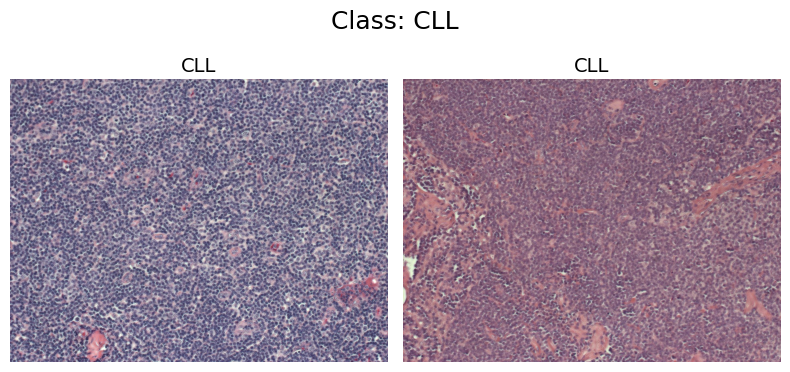

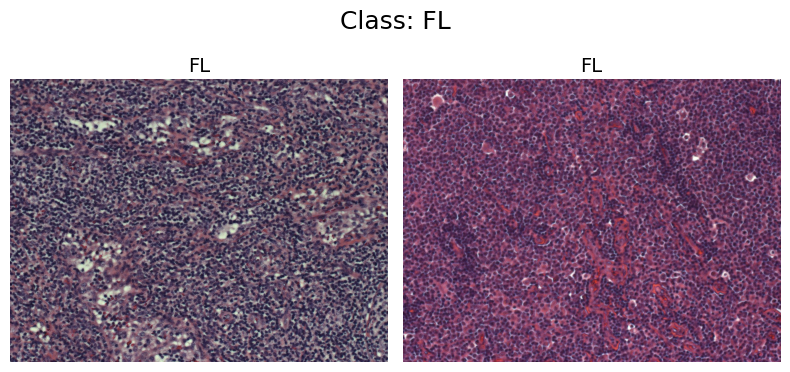

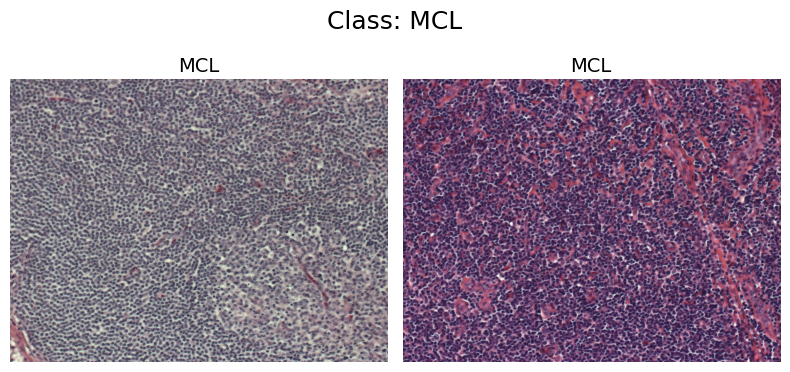

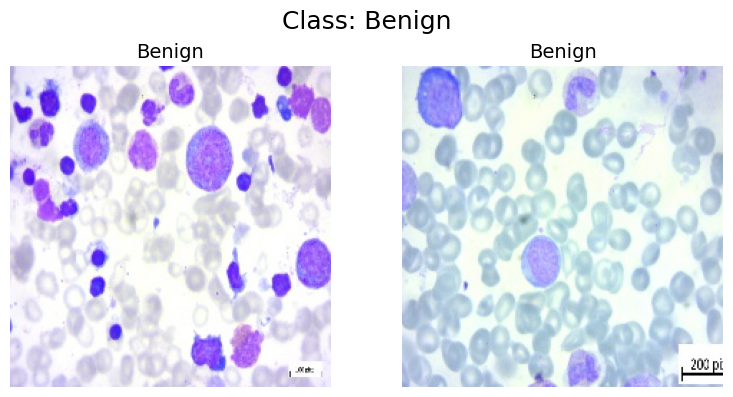

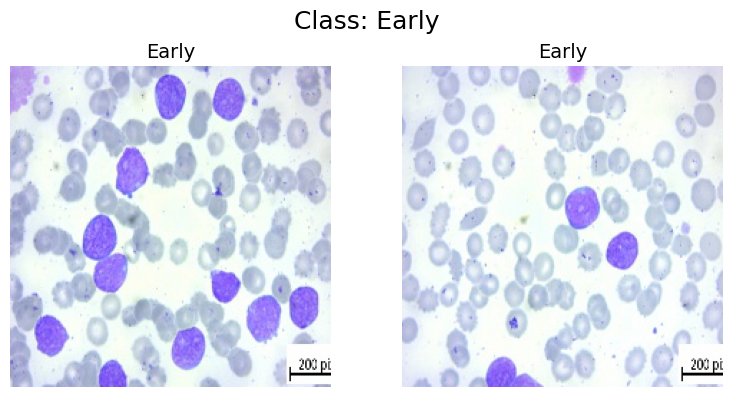

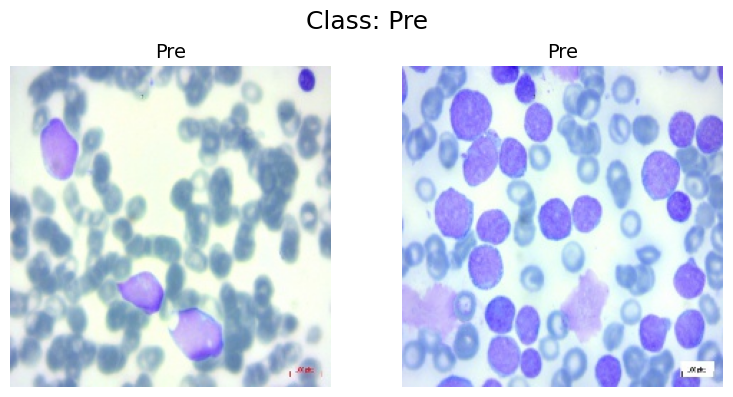

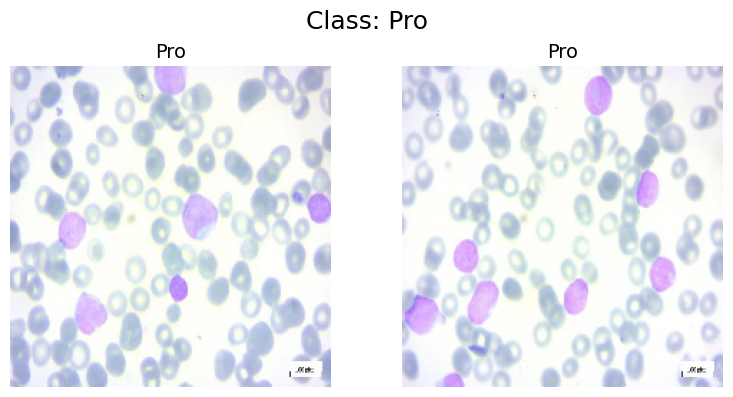

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

def display_images_by_class(df, class_col='Class', img_col='IMAGE', samples_per_class=2):
    classes = df[class_col].unique()
    
    for cls in classes:
        class_images = df[df[class_col] == cls].sample(samples_per_class, random_state=42)
        
        plt.figure(figsize=(4 * samples_per_class, 4))
        for idx, (_, row) in enumerate(class_images.iterrows(), 1):
            plt.subplot(1, samples_per_class, idx)
            image = Image.open(row[img_col])
            plt.imshow(image)
            plt.title(f"{cls}", fontsize=14)
            plt.axis('off')
        
        plt.suptitle(f"Class: {cls}", fontsize=18)
        plt.tight_layout()
        plt.show()

# Usage example:
display_images_by_class(df_combined, class_col='Class', img_col='IMAGE', samples_per_class=2)

In [18]:
#Inspect the number of rows of the segmented images
rows = df_combined.shape[0]
rows

3630

In [19]:
#Use the group by function on the class label column of the dataframe to check for class imbalance
grouped_class = df_combined.groupby(['Class']).count()
grouped_class

IMAGE  image_type
Class                    
Benign    504         504
CLL       113         113
Early     985         985
FL        139         139
MCL       122         122
Pre       963         963
Pro       804         804

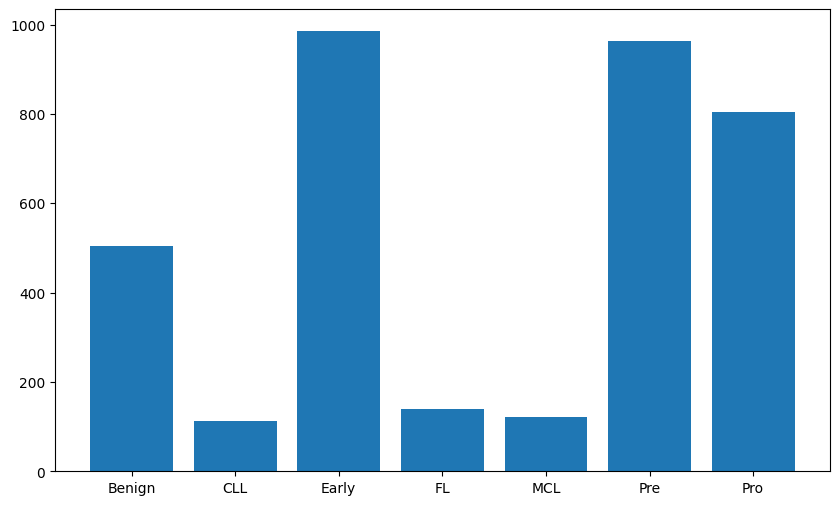

In [20]:
#Plot the grouped data in a bar chart to see the class balance
plt.figure(figsize=(10, 6))
bar_plot = plt.bar(x=grouped_class.index, height=grouped_class['IMAGE'])

#Treating class imbalance

Given the imbalance as seen in Benign and Pro, we will use data augmentation on the training data to balance the dataset during training.

In [15]:
classes = ['Pro', 'Benign', 'Pre', 'Early']
image_types = ['Original', 'Segmented']

In the code below, we aim to visualize the difference between the original image of a PBS and the segmented image to see the difference. Notice from the result of the plot how the segmented images ignored other details of the PBS while highlighting onnly the blood cells of interest, whereas the original blood sample images showed all the cells.

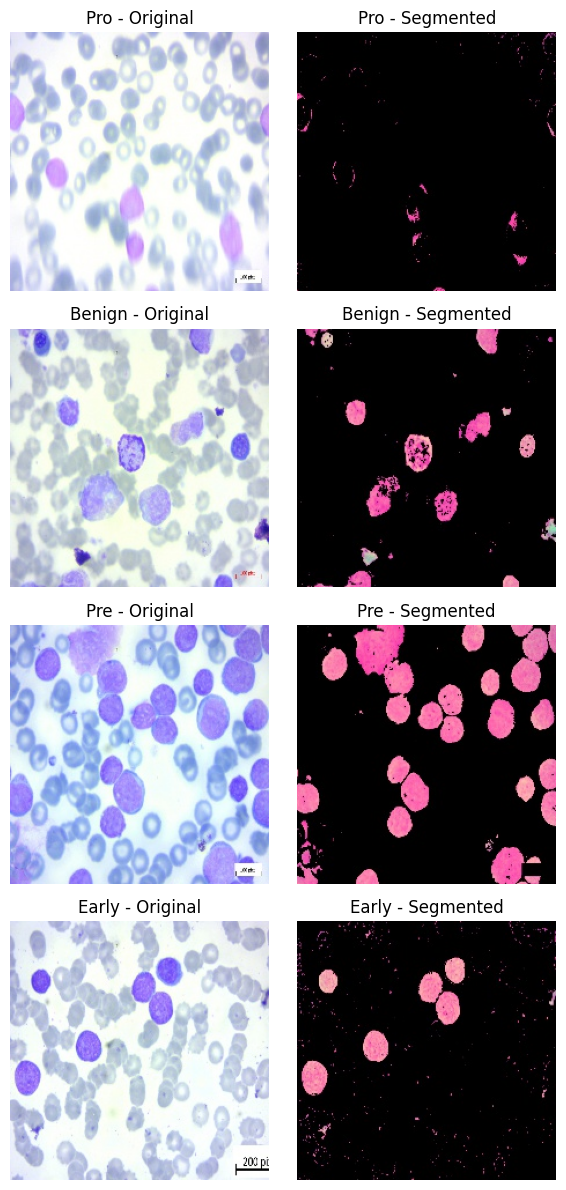

In [16]:
# Setting up the plot
fig, axs = plt.subplots(len(classes), len(image_types), figsize=(3 * len(image_types), 3 * len(classes)))

for i, cls in enumerate(classes):
    for j, img_type in enumerate(image_types):
        # Filter the DataFrame for the current class and image type.
        filtered_df = df[(df['Class'] == cls) & (df['image_type'] == img_type)]

        if not filtered_df.empty:
            # Selecting the first image for demonstration if the filtered current class is not empty
            image_path = filtered_df.iloc[0]['IMAGE']
            class_label = filtered_df.iloc[0]['Class']

            # Load selected images and display the them
            img = mpimg.imread(image_path)
            if len(classes) > 1 or len(image_types) > 1:  # Get more than one subplot
                axs[i, j].imshow(img)
                axs[i, j].set_title(f'{class_label} - {img_type}')
                axs[i, j].axis('off')
            else:  # Plot a single subplot
                axs.imshow(img)
                axs.set_title(f'{class_label} - {img_type}')
                axs.axis('off')
        else:
            print(f"No images found for Class: {cls} - {img_type}")

plt.tight_layout()
plt.show()


#Encode the data frame

In [21]:
import pandas as pd
from sklearn.utils import resample


# Get the number of images in the Benign class (majority class)
benign_count = df_combined[df_combined['Class'] == 'Benign'].shape[0]

# List to hold balanced dataframes
balanced_dataframes = []

# Iterate through each class and resample
for label in df_combined['Class'].unique():
    class_df = df_combined[df_combined['Class'] == label]
    
    if label != 'Benign':
        # Oversample minority class
        class_upsampled = resample(class_df, 
                                   replace=True,              # sampling with replacement
                                   n_samples=benign_count,    # to match benign class count
                                   random_state=42)           # reproducible results
        balanced_dataframes.append(class_upsampled)
    else:
        # Keep Benign class as is
        balanced_dataframes.append(class_df)

# Concatenate all balanced class dataframes
balanced_df = pd.concat(balanced_dataframes)

# Shuffle the resulting dataframe
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the balanced DataFrame as CSV
balanced_df.to_csv('/kaggle/working/extracted_images/balanced_image_dataset.csv', index=False)

# Check new class distribution
print(balanced_df['Class'].value_counts())

Class
CLL       504
Pro       504
Pre       504
FL        504
Early     504
Benign    504
MCL       504
Name: count, dtype: int64


In [22]:
#Convert the class label to numerical using the replace function
balanced_df['Class'] = balanced_df['Class'].replace('Benign', 0)
balanced_df['Class'] = balanced_df['Class'].replace('Early', 1)
balanced_df['Class'] = balanced_df['Class'].replace('Pre', 2)
balanced_df['Class'] = balanced_df['Class'].replace('Pro', 3)
balanced_df['Class'] = balanced_df['Class'].replace('CLL', 4)
balanced_df['Class'] = balanced_df['Class'].replace('FL', 5)
balanced_df['Class'] = balanced_df['Class'].replace('MCL', 6)

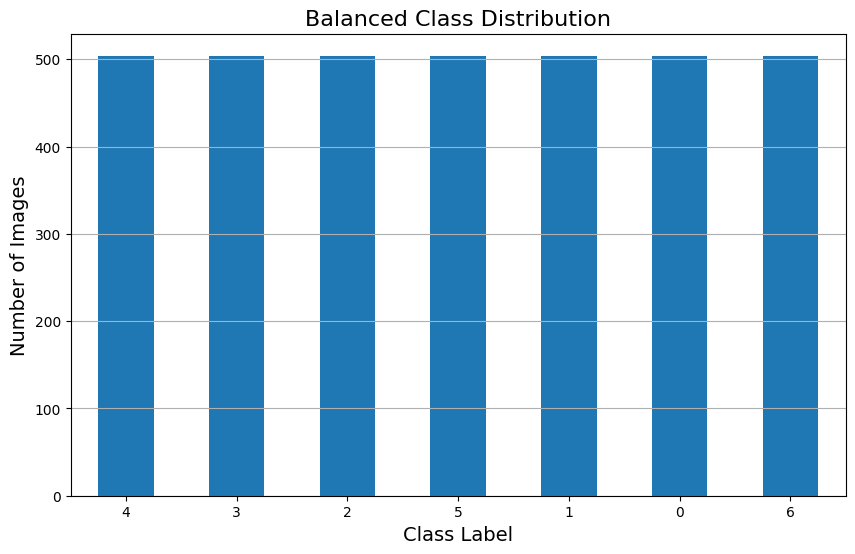

In [23]:
import matplotlib.pyplot as plt
import pandas as pd


# Plotting the class distribution
plt.figure(figsize=(10, 6))
balanced_df['Class'].value_counts().plot(kind='bar')

plt.title('Balanced Class Distribution', fontsize=16)
plt.xlabel('Class Label', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [26]:
# Splitting the dataset into training and temp (temporary split is used for further splitting into validation and test)
train_data, val_test_data = train_test_split(balanced_df, test_size=0.2, stratify=balanced_df['Class'], random_state=42)


# Further splitting the temp dataset into validation and test dataset
val_data, test_data = train_test_split(val_test_data, test_size=0.5, stratify=val_test_data['Class'], random_state=42)

In [27]:
train_data

IMAGE  Class image_type
778   /kaggle/input/all-dataset/Original/Benign/WBC-...      0   Original
942   /kaggle/input/all-dataset/Original/Pre/WBC-Mal...      2   Original
1754  /kaggle/working/extracted_images/sj-05-5389-R1...      5   Original
59    /kaggle/working/extracted_images/sj-05-1374_00...      6   Original
1313  /kaggle/input/all-dataset/Original/Early/WBC-M...      1   Original
...                                                 ...    ...        ...
782   /kaggle/input/all-dataset/Original/Benign/WBC-...      0   Original
2467  /kaggle/input/all-dataset/Original/Pro/WBC-Mal...      3   Original
206   /kaggle/input/all-dataset/Original/Pre/WBC-Mal...      2   Original
1984  /kaggle/input/all-dataset/Original/Benign/WBC-...      0   Original
1167  /kaggle/input/all-dataset/Original/Benign/WBC-...      0   Original

[2822 rows x 3 columns]

In [28]:
#Initialize or define the batch size and the image size
batch_size = 32
target_size = (224, 224)

#Create a tensor flow data from the training, test and validation data

#Define the image loader and pre-processor
Here we only set the shape and then resize the images to be used for training

In [40]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, models

In [41]:
# Define the input shape
input_shape = (224, 224, 3)

In [45]:
pip install torch torchvision timm

Note: you may need to restart the kernel to use updated packages.


In [30]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os

In [31]:
transform_aug = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Randomly flip the image
    transforms.RandomRotation(15),      # Randomly rotate the image
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [48]:
batch_size = 32

In [32]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os

# Define transformations (similar to what you've done in TensorFlow)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # Converts image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizes the image
])

# Custom Dataset if you are loading from a CSV or DataFrame
class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

# Create PyTorch dataset (you can replace the DataFrame columns with your dataset paths and labels)
train_dataset = CustomDataset(train_data['IMAGE'].values, train_data['Class'].values, transform=transform_aug)
val_dataset = CustomDataset(val_data['IMAGE'].values, val_data['Class'].values, transform=transform)
test_dataset = CustomDataset(test_data['IMAGE'].values, test_data['Class'].values, transform=transform)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [38]:
import timm
import torch.nn as nn
import torch


# Initialize ConvNeXt model with 4 output classes
convnext_model = timm.create_model('convnext_base', pretrained=True, num_classes=7)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
convnext_model = convnext_model.to(device)

In [39]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_convnext = torch.optim.Adam(convnext_model.parameters(), lr=1e-4)

In [40]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device='cuda'):
    model = model.to(device)
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct = 0
        total = 0

        # Training loop
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Track loss and accuracy
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

        # Validation loop (optional)
        model.eval()
        with torch.no_grad():
            val_correct = 0
            val_total = 0
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

            val_acc = 100 * val_correct / val_total
            print(f"Validation Accuracy: {val_acc:.2f}%")

    print("Training complete.")

In [41]:
# Force the model to use the CPU
device = torch.device("cpu")

In [42]:
# Train ConvNeXt model
train_model(convnext_model, train_loader, val_loader, criterion, optimizer_convnext, num_epochs=10, device=device)

Epoch [1/10], Loss: 0.3986, Accuracy: 83.63%
Validation Accuracy: 94.62%
Epoch [2/10], Loss: 0.0702, Accuracy: 97.87%
Validation Accuracy: 99.72%
Epoch [3/10], Loss: 0.0607, Accuracy: 98.19%
Validation Accuracy: 98.87%
Epoch [4/10], Loss: 0.0065, Accuracy: 99.79%
Validation Accuracy: 100.00%
Epoch [5/10], Loss: 0.0024, Accuracy: 99.89%
Validation Accuracy: 97.17%
Epoch [6/10], Loss: 0.0371, Accuracy: 98.58%
Validation Accuracy: 100.00%
Epoch [7/10], Loss: 0.0185, Accuracy: 99.47%
Validation Accuracy: 99.72%
Epoch [8/10], Loss: 0.0107, Accuracy: 99.54%
Validation Accuracy: 100.00%
Epoch [9/10], Loss: 0.0097, Accuracy: 99.68%
Validation Accuracy: 99.72%
Epoch [10/10], Loss: 0.0004, Accuracy: 100.00%
Validation Accuracy: 100.00%
Training complete.


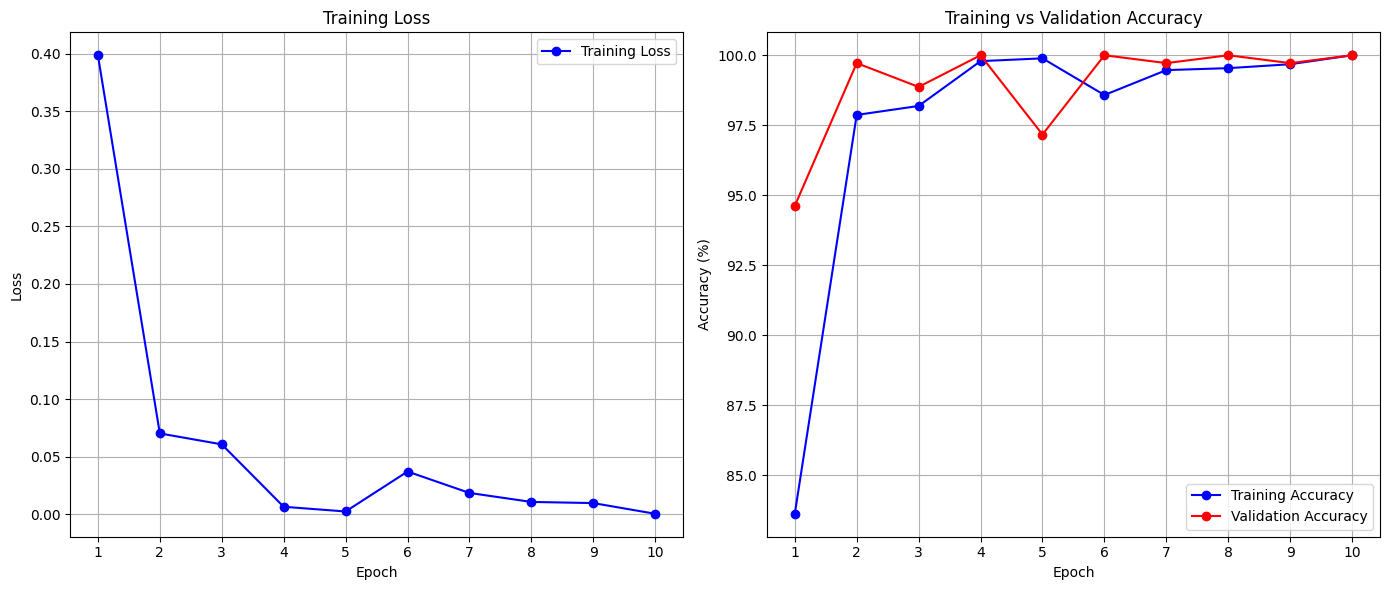

In [51]:
import matplotlib.pyplot as plt

# Manually enter the provided data
epochs = list(range(1, 11))

# Training and Validation Loss data
train_losses = [0.3986, 0.0702, 0.0607, 0.0065, 0.0024, 0.0371, 0.0185, 0.0107, 0.0097, 0.0004]
# (Validation loss was not explicitly given, so we'll plot accuracy only)

# Training and Validation Accuracy data
train_accuracies = [83.63, 97.87, 98.19, 99.79, 99.89, 98.58, 99.47, 99.54, 99.68, 100.00]
val_accuracies = [94.62, 99.72, 98.87, 100.00, 97.17, 100.00, 99.72, 100.00, 99.72, 100.00]

# Set up figure
plt.figure(figsize=(14, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, marker='o', linestyle='-', color='blue', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xticks(epochs)
plt.grid()
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, marker='o', linestyle='-', color='blue', label='Training Accuracy')
plt.plot(epochs, val_accuracies, marker='o', linestyle='-', color='red', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy')
plt.xticks(epochs)
plt.grid()
plt.legend()

# Display plots
plt.tight_layout()
plt.show()

In [45]:
# Evaluate the trained ConvNeXt
evaluate_model(convnext_model, test_loader, device)

Test Accuracy: 100.00%


100.0

In [44]:
torch.save(convnext_model.state_dict(), '/kaggle/working/convnext_model.pth')

Confusion Matrix

In [46]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model_for_confusion_matrix(model, loader, device='cuda'):
    model.eval()
    true_labels = []
    predicted_labels = []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)

            # Get model predictions
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            # Store true and predicted labels
            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(preds.cpu().numpy())

    return np.array(true_labels), np.array(predicted_labels)

In [47]:
def plot_confusion_matrix(true_labels, predicted_labels, classes):
    # Generate the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Plot the confusion matrix using Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

CLL, Pro, Pre, FL, Early, Benign, MCL

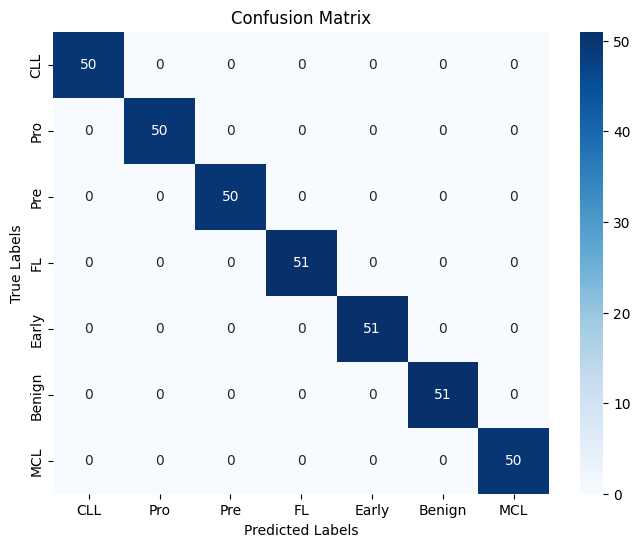

In [48]:
# Assuming you have a test_loader and a list of class names
class_names = ['CLL', 'Pro', 'Pre', 'FL', 'Early', 'Benign', 'MCL']  # Replace with actual class names

# Get true and predicted labels
true_labels, predicted_labels = evaluate_model_for_confusion_matrix(convnext_model, test_loader, device=device)

# Plot the confusion matrix
plot_confusion_matrix(true_labels, predicted_labels, class_names)

Matrix for swin

Freezing the layers ensures that the learned features ikn the transfer learning algorithm which has been trained on a large image in image net are preserved and utilized as-is, without being distorted by the new training process on a potentially smaller or more specific dataset. It can also help in prevennting overfitting by concentrating only on the features of the current dataset. and can most importantly increase training and computational time.

Below we use the functional method to initialize our transfer learning model adapting the output or dense layer to the number of classes we have